In [1]:
import os

import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import sonnet as snt

from graph_nets import graphs
from gan4hep import rnn_rnn_gan as toGan
from gan4hep.graph import loop_dataset
from gan4hep.graph import read_dataset

In [32]:
batch_size = 1000
test_data_name = '/global/homes/x/xju/work/Herwig/PrimaryOnly_1M/inputs/test/primary_11.tfrec'

In [37]:
dataset, n_graphs = read_dataset(test_data_name)
n_batches = n_graphs//batch_size
print("total {} graphs iterated with batch size of {} and {} batches".format(n_graphs, batch_size, n_batches))
test_data = loop_dataset(dataset, batch_size)

total 5000 graphs iterated with batch size of 1000 and 5 batches


In [38]:
truth_4vec = []
for ib in range(n_batches):
    inputs, targets = next(test_data)

    truth_4vec.append(tf.reshape(targets.nodes, [batch_size, -1, 4]).numpy())

In [79]:
len(truth_4vec), targets.nodes.shape

(5000, TensorShape([3000, 4]))

In [40]:
truth_4vec = np.concatenate(truth_4vec, axis=0)

In [41]:
truth_4vec.shape

(5000, 3, 4)

In [42]:
def get_pt_eta_phi(px, py, pz):
    p = np.sqrt(px**2 + py**2 + pz**2)
    pt = np.sqrt(px**2 + py**2)
    phi = np.arctan2(py, px)
    theta = np.arccos(pz/p)
    eta = -np.log(np.tan(0.5*theta))
    return pt,eta,phi

In [65]:
def view_particle(particles):
    pt, eta, phi = get_pt_eta_phi(particles[:, 1], particles[:, 2], particles[:, 3])
    fig, axs = plt.subplots(2,2, figsize=(8,8))
    axs = axs.flatten()
    axs[0].hist(pt)
    axs[0].set_xlabel("pT [GeV]")
    axs[1].hist(eta)
    axs[1].set_xlabel("$\eta$")
    axs[2].hist(phi)
    axs[2].set_xlabel("$\phi$")
    axs[3].hist(particles[:, 0])
    axs[3].set_xlabel("E [GeV]")
    print("Max pT: {:.2f} GeV".format(np.max(pt)))
    print("Max eta: {:.2f}".format(np.max(np.abs(eta))))
    print("Max E: {:.2f} GeV".format(np.max(particles[:, 0])))

### Input particle

* Maximum pT is about 50 GeV
* Maximum eta is about 4


In [43]:
inputs = truth_4vec[:, 0, :]
inputs.shape

(5000, 4)

Max pT: 47.95 GeV
Max eta: 5.21
Max E: 49.03 GeV


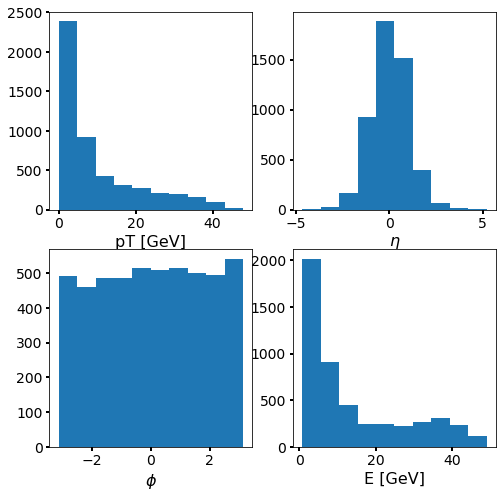

In [66]:
view_particle(inputs)

### Decay particle 1

In [67]:
output1 = truth_4vec[:, 1, :]
output1.shape

(5000, 4)

Max pT: 38.55 GeV
Max eta: 4.65
Max E: 43.51 GeV


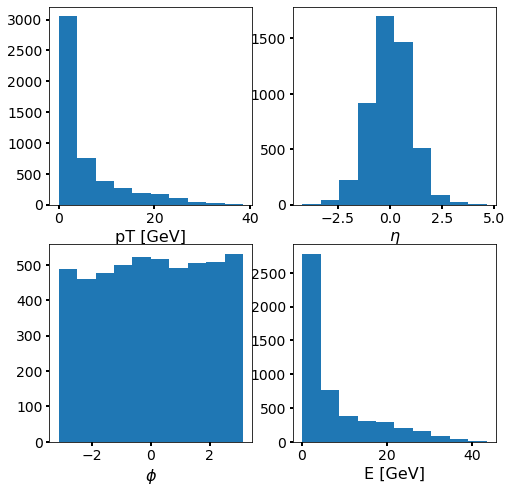

In [68]:
view_particle(output1)

### Decay particle 2

In [69]:
output2 = truth_4vec[:, 2, :]
output2.shape

(5000, 4)

Max pT: 37.20 GeV
Max eta: 4.95
Max E: 44.23 GeV


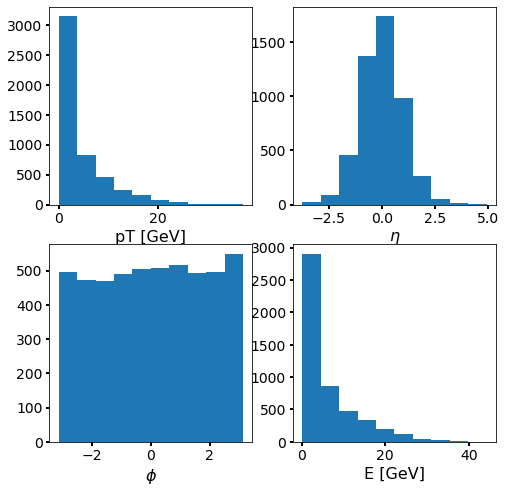

In [70]:
view_particle(output2)

In [76]:
a = np.stack([pt, eta], axis=1)

In [77]:
a.shape

(5000, 2)